In [1]:
# Exemplo de caminho: pode ser uma pasta dentro do seu diretório home
# Lembre-se que o R pode adicionar subdiretórios específicos da versão/arquitetura
meu_caminho_biblioteca <- "~/R/library"

# Define a variável de ambiente R_LIBS_USER para a sessão atual
Sys.setenv(R_LIBS_USER = meu_caminho_biblioteca)

# Verifica o valor da variável de ambiente
Sys.getenv("R_LIBS_USER")

# Mostra todos os caminhos de biblioteca que o R está usando
# O seu novo caminho deve aparecer aqui, geralmente como o primeiro da lista.
.libPaths()

[1] "~/R/library"

[1] "/usr/local/lib/R/site-library" "/usr/local/lib/R/library"     
[3] "/home/vscode/R/library"

In [2]:
################################################################################
#                       MANUAL DE ANÁLISE DE DADOS                             #
#                  Luiz Paulo Fávero e Patrícia Belfiore                       #
#                              Capítulo 02                                     #
################################################################################

################################################################################
#               INSTALAÇÃO E CARREGAMENTO DE PACOTES NECESSÁRIOS               #
################################################################################
# Pacotes utilizados
pacotes <- c("tidyverse", #carregar outros pacotes do R
             "knitr", "kableExtra", #formatação de tabelas
             "questionr", #tabela de frequências - função freq
             "e1071", #medidas de assimetria e curtose
             "plotly") #plataforma gráfica

if(sum(as.numeric(!pacotes %in% installed.packages())) != 0){
  instalador <- pacotes[!pacotes %in% installed.packages()]
  for(i in 1:length(instalador)) {
    install.packages(instalador, dependencies = T)
    break()}
  sapply(pacotes, require, character = T) 
} else {
  sapply(pacotes, require, character = T) 
}


Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: knitr

Loading required package: kableExtra


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading required package: questionr

Loading required package: e1071


Attaching package: ‘e1071’


The following object is masked from ‘package:ggplot2’:

    element


Loading required package: plotly


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last

tidyverse      knitr kableExtra  questionr      e1071     plotly 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE

In [3]:

################################################################################
#                DESCRIÇÃO E EXPLORAÇÃO DO DATASET 'Cotações'                  #
################################################################################

# Substitua o caminho abaixo pelo diretório correto onde o arquivo está localizado

# 1. Obter o diretório base atual
# digite pwd no terminal para descobrir o seu base_dir, ou teste com getwd() no R
base_dir <- "/workspaces/Stats-In-Codespace"

# 2. Definir o caminho do diretório desejado
caminho_diretorio <- file.path(base_dir, "Aula1", "Cap2-Favero")

# 5. Agora que o diretório garantidamente existe, definir como diretório de trabalho
setwd(caminho_diretorio)

# 6. (Opcional) Verificar se o diretório de trabalho foi alterado com sucesso
print(paste("Diretório de trabalho atual:", getwd()))

# Carregamento da base de dados 'Cotações'
load(file = "Cotações.RData")


[1] "Diretório de trabalho atual: /workspaces/Stats-In-Codespace/Aula1/Cap2-Favero"


<table class="table table-striped" style="font-size: 20px; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:right;"> preço </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 18.7 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 18.3 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 18.4 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 18.7 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 18.8 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 18.8 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 19.1 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 18.9 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 19.1 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 19.9 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 18.5 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 18.5 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 18.1 </td>
  </tr>
  <tr>
 


16.9 17.5 17.9 18.1 18.2 18.3 18.4 18.5 18.7 18.8 18.9 19.1 19.9 
   1    1    1    2    1    2    1    2    2    3    1    2    1 

,n,%,val%
,<dbl>,<dbl>,<dbl>
16.9,1,5,5
17.5,1,5,5
17.9,1,5,5
18.1,2,10,10
18.2,1,5,5
18.3,2,10,10
18.4,1,5,5
18.5,2,10,10
18.7,2,10,10


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.90   18.18   18.50   18.48   18.80   19.90 

[1] 18.475

[1] 18.5

[1] 16.9

[1] 19.9

25% 
18.175

75% 
18.8

[1] 0.6323515

[1] 0.3998684

[1] -0.3367489

[1] -0.3646914

[1] 1.752875

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


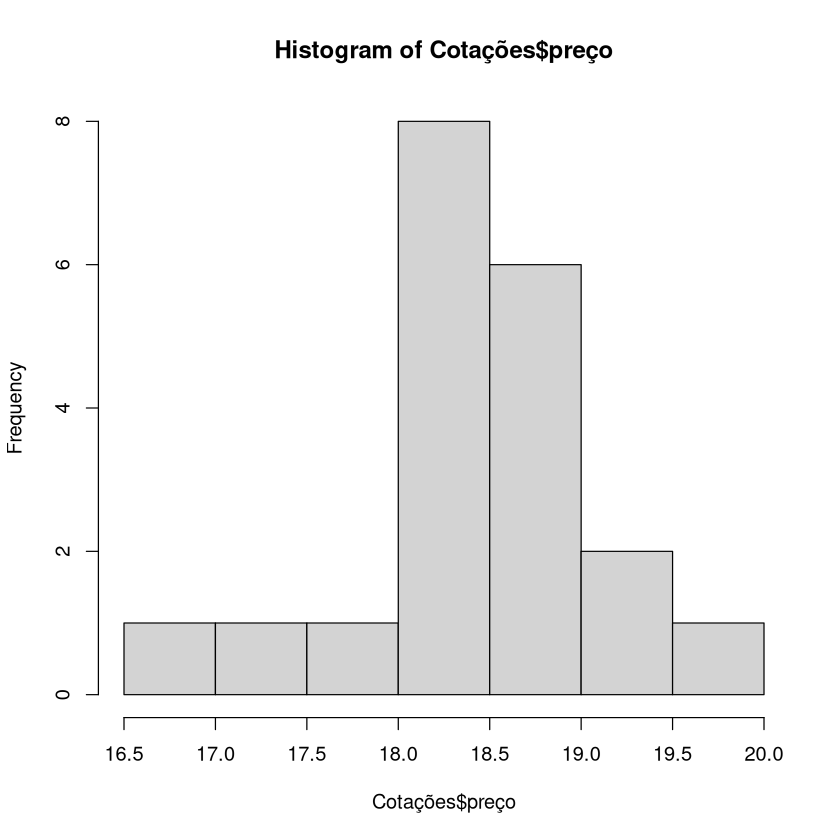

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


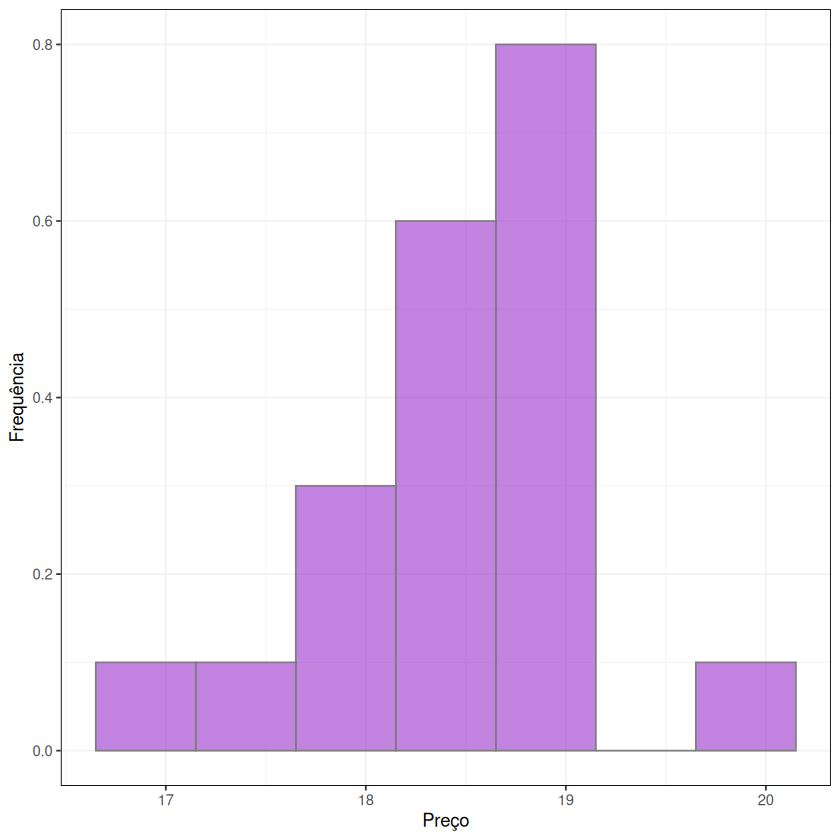


  The decimal point is at the |

  16 | 9
  17 | 
  17 | 59
  18 | 112334
  18 | 55778889
  19 | 11
  19 | 9



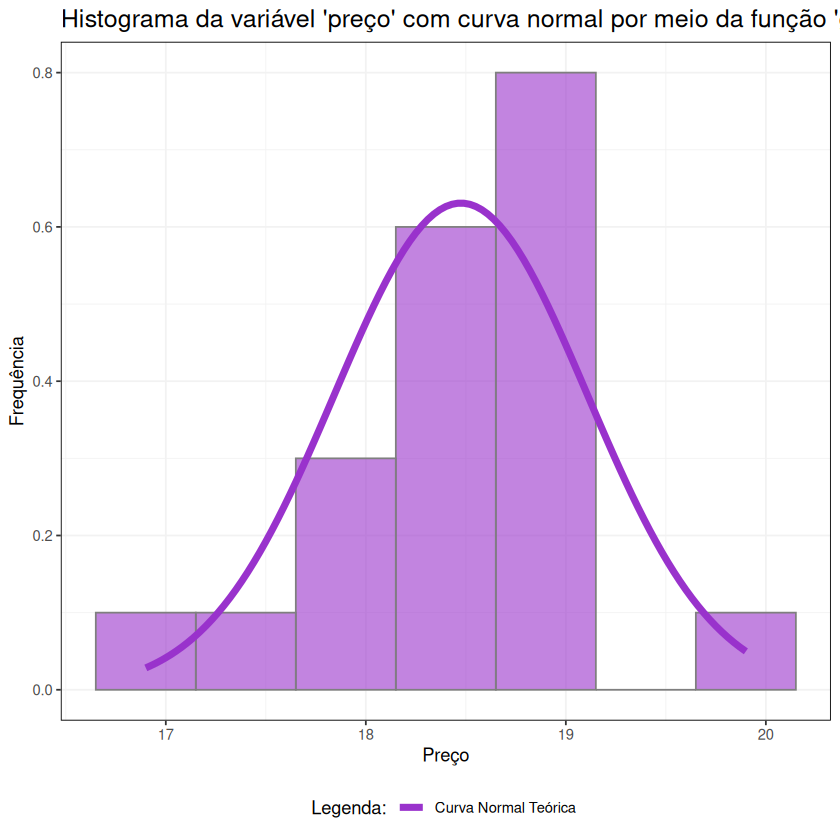

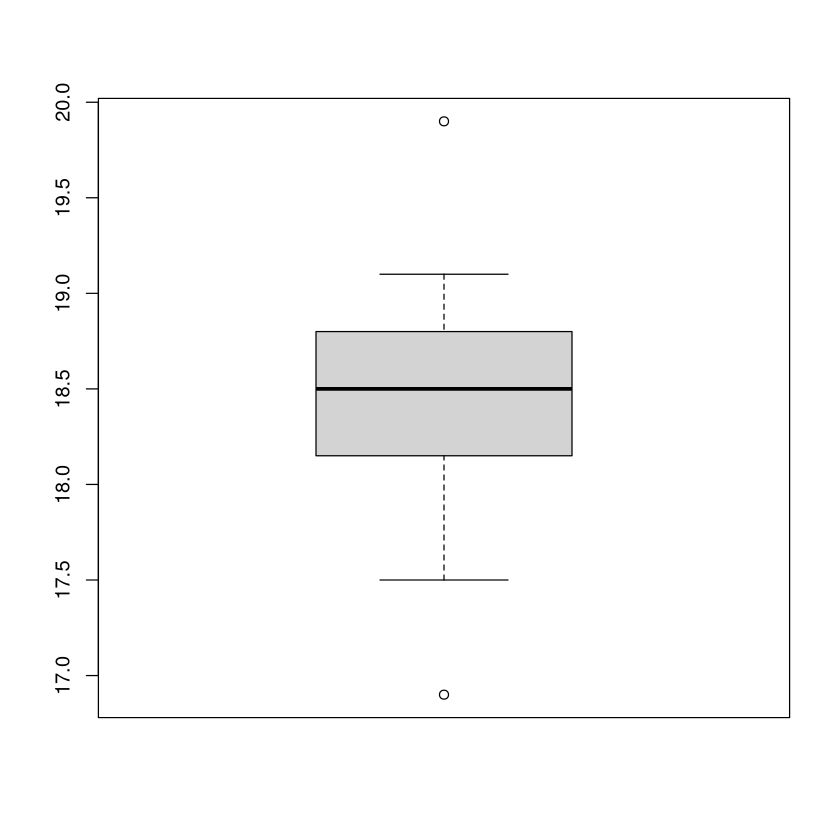

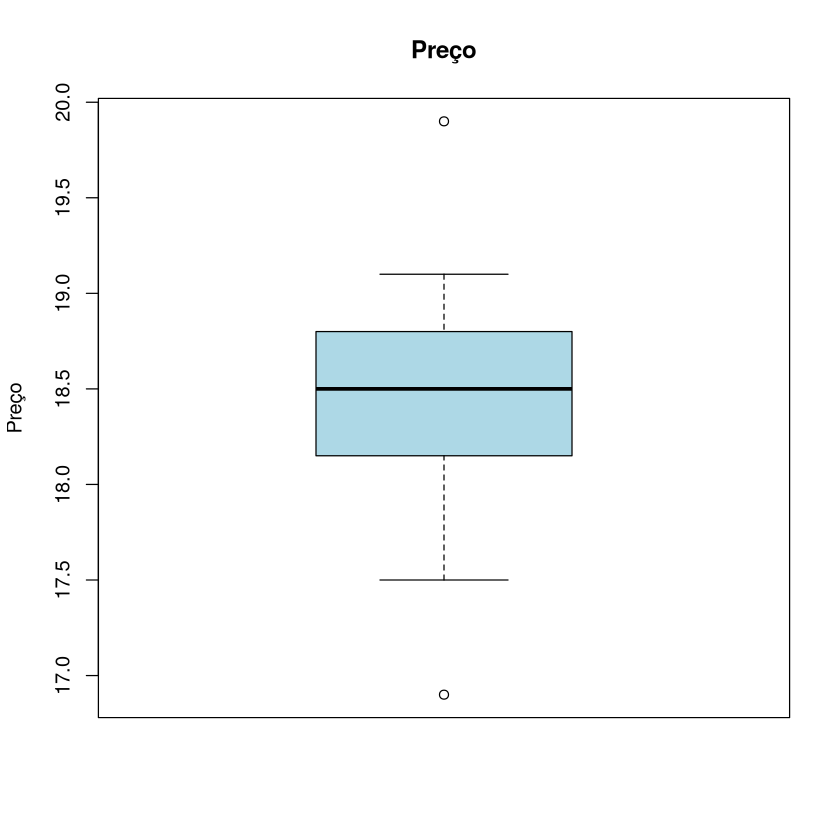

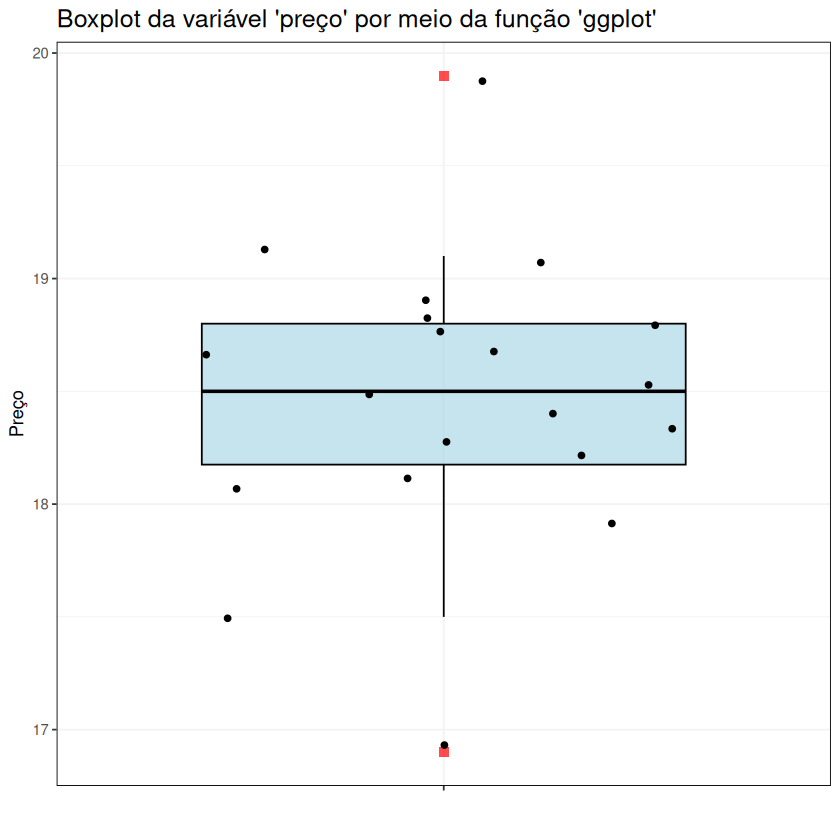

In [4]:

# Visualização da base de dados 'Cotações'
Cotações %>%
  kable() %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = F, 
                font_size = 20)

# Tabela de frequências da variável 'preço'
table(Cotações$preço)
freq(Cotações$preço)

# Estatísticas descritivas univariadas da variável 'preço'
summary(Cotações$preço)
mean(Cotações$preço)
median(Cotações$preço)
min(Cotações$preço)
max(Cotações$preço)
quantile(Cotações$preço, .25)
quantile(Cotações$preço, .75)
sd(Cotações$preço)
var(Cotações$preço)

# Medidas de assimetria e curtose para a variável 'preço'
skewness(Cotações$preço, type = 1) # igual ao Stata
skewness(Cotações$preço, type = 2) # igual ao SPSS
kurtosis(Cotações$preço, type = 2) # igual ao SPSS

# Gráficos: histograma, ramo-e-folhas e boxplot para a variável 'preço'
# Histograma simples
hist(Cotações$preço)

# Histograma por meio da função 'ggplot'
Cotações %>%
  ggplot(aes(x = preço)) +
  geom_histogram(aes(y = ..density..),
                 color = "grey50",
                 fill = "darkorchid",
                 bins = 7,
                 alpha = 0.6) +
  labs(x = "Preço",
       y = "Frequência") +
  theme(panel.background = element_rect("white"),
        panel.grid = element_line("grey95"),
        panel.border = element_rect(NA),
        legend.position = "bottom")

# Histograma com curva normal por meio da função 'ggplot'
Cotações %>%
  ggplot(aes(x = preço)) +
  geom_histogram(aes(y = ..density..),
                 color = "grey50",
                 fill = "darkorchid",
                 bins = 7,
                 alpha = 0.6) +
  stat_function(fun = dnorm, 
                args = list(mean = mean(Cotações$preço),
                            sd = sd(Cotações$preço)),
                aes(color = "Curva Normal Teórica"),
                size = 2) +
  scale_color_manual("Legenda:",
                     values = "darkorchid") +
  labs(x = "Preço",
       y = "Frequência") +
  theme(panel.background = element_rect("white"),
        panel.grid = element_line("grey95"),
        panel.border = element_rect(NA),
        legend.position = "bottom",
        plot.title = element_text(size=15)
  ) +
  ggtitle("Histograma da variável 'preço' com curva normal por meio da função 'ggplot'")

# Gráfico de ramo-e-folhas para a variável 'preço'
stem(Cotações$preço, scale = 2)
# O argumento 'scale = 2' faz com que o gráfico seja aproximadamente
#duas vezes maior que o padrão.

# Boxplot da variável 'preço'
# Boxplot simples
boxplot(Cotações$preço)

boxplot(Cotações$preço, 
        ylab = "Preço",
        main = "Preço",
        notch = FALSE,
        varwidth = FALSE,
        col = c("lightblue")
)

# Boxplot por meio da função 'ggplot'
Cotações %>%
  ggplot(aes(y = preço, x = "")) +
  geom_boxplot(fill = "lightblue",      # cor da caixa
               alpha = 0.7,             # transparência
               color = "black",         # cor da borda
               outlier.colour = "red",  # cor dos outliers
               outlier.shape = 15,      # formato dos marcadores dos outliers
               outlier.size = 2.5) +    # tamanho dos marcadores dos outliers
  geom_jitter() +
  labs(y = "Preço") +
  theme(panel.background = element_rect("white"),
        panel.grid = element_line("grey95"),
        panel.border = element_rect(NA),
        legend.position="none",
        plot.title = element_text(size=15)
        ) +
  ggtitle("Boxplot da variável 'preço' por meio da função 'ggplot'") +
  xlab("")

################################################################################